<a href="https://colab.research.google.com/github/baby1146/baby1146/blob/main/Credit_Card_Fraud_deduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

### Importing necessary Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### Loading the Data

In [28]:
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,257457.000000,...,257457.000000,257457.000000,257457.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000,257456.000000
mean,87384.361404,-0.025913,-0.017699,0.077013,0.018342,-0.030130,0.014143,-0.012766,0.001525,0.000412,...,-0.001042,-0.007938,-0.004565,0.001145,0.016056,0.001144,-0.000634,0.000673,90.310332,0.001826
std,43797.031127,1.958384,1.663655,1.508987,1.415882,1.372251,1.325597,1.224968,1.194623,1.109452,...,0.737726,0.718716,0.632706,0.605703,0.516480,0.484610,0.401242,0.330214,250.352826,0.042688
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,51121.000000,-0.930932,-0.609169,-0.759697,-0.841283,-0.720695,-0.752965,-0.563024,-0.203194,-0.653467,...,-0.225651,-0.535619,-0.164172,-0.350902,-0.297973,-0.329354,-0.070696,-0.051155,5.990000,0.000000
50%,78814.000000,0.006266,0.059821,0.272167,0.006723,-0.087094,-0.255660,0.024675,0.027344,-0.056592,...,-0.030374,0.001484,-0.016507,0.044334,0.043837,-0.057940,0.001936,0.013289,22.950000,0.000000
75%,129987.000000,1.276913,0.783677,1.084847,0.782975,0.576097,0.416600,0.552151,0.329577,0.605950,...,0.179478,0.505977,0.138841,0.434168,0.361674,0.246427,0.089254,0.077737,79.200000,0.000000
max,158176.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257457 entries, 0 to 257456
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    257457 non-null  float64
 1   V1      257457 non-null  float64
 2   V2      257457 non-null  float64
 3   V3      257457 non-null  float64
 4   V4      257457 non-null  float64
 5   V5      257457 non-null  float64
 6   V6      257457 non-null  float64
 7   V7      257457 non-null  float64
 8   V8      257457 non-null  float64
 9   V9      257457 non-null  float64
 10  V10     257457 non-null  float64
 11  V11     257457 non-null  float64
 12  V12     257457 non-null  float64
 13  V13     257457 non-null  float64
 14  V14     257457 non-null  float64
 15  V15     257457 non-null  float64
 16  V16     257457 non-null  float64
 17  V17     257457 non-null  float64
 18  V18     257457 non-null  float64
 19  V19     257457 non-null  float64
 20  V20     257457 non-null  float64
 21  V21     25

In [31]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [32]:
data_df =df.dropna()

In [33]:
data_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### Analyzing Class Distribution

In [34]:
fraud = data_df[data_df['Class'] == 1]
valid = data_df[data_df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data_df[data_df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data_df[data_df['Class'] == 0])))

0.0018288934027534574
Fraud Cases: 470
Valid Transactions: 256986


In [35]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252774,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1.0
254344,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1.0
254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,...,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,7.59,1.0
255403,157207.0,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,...,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,1.0


### Exploring Transaction Amounts

In [36]:

print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,470.000000
mean,122.636404
std,260.193766
min,0.000000
25%,1.000000
50%,8.770000
75%,104.615000
max,2125.870000


In [37]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,256986.000000
mean,90.251211
std,250.331175
min,0.000000
25%,5.990000
50%,22.950000
75%,79.070000
max,19656.530000


### Plotting Correlation Matrix

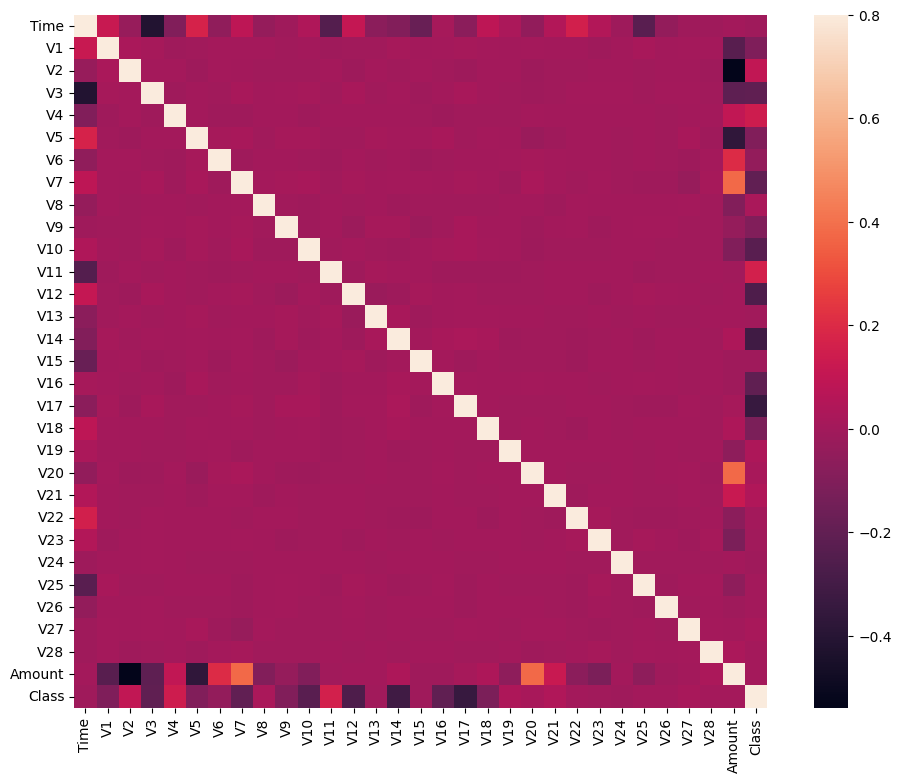

In [38]:
corrmat = data_df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### Preparing Data

In [39]:
X = data_df.drop(['Class'], axis = 1)
Y = data_df["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(257456, 30)
(257456,)


### Building and Training the Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

### Evaluating the Model

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9444
Recall: 0.7907
F1-Score: 0.8608
Matthews Correlation Coefficient: 0.8640


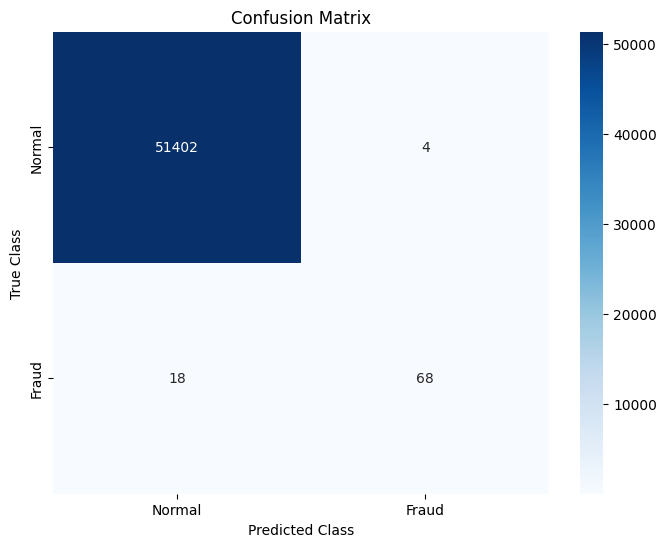

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()